# INTRODUCTION:

xxxxxxxxxx

# THE METRIC:

xxxxxxxxxx

# THE BEST NEIGHBORHOOD:

xxxxxxxxx

### **Non-Traffic Violation Data**

In [ ]:
import pandas as pd

data = pd.read_csv("violations.tsv", sep = "\t")

Below is a dictionary of neighborhoods and the number of non-traffic violations in those neighborhoods.

In [ ]:
ref_data = pd.DataFrame({'NEIGHBORHOOD': data['NEIGHBORHOOD']})
location_counts = dict()

for index, row in ref_data.iterrows():
    loc = row['NEIGHBORHOOD']
    if loc in location_counts:
        location_counts[loc] += 1
    else:
        location_counts[loc] = 1

location_counts

### **Arrest Data**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### READ IN DATA:

In [20]:
df = pd.read_csv("arrest_data.csv")
df.head(5)

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900


#### CLEAN DATA:

In [5]:
#Gets rid of any columns with blank data
df_clean = df[df['INCIDENTNEIGHBORHOOD'].notna()]
#Since we are looking at neighborhoods within the city, we will omit anything outside of the Greater Pittsburgh Region. 
df_clean = df_clean[df_clean['INCIDENTNEIGHBORHOOD'] != "Outside City"]
df_clean.head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 Retail Theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699


#### BASIC ANALYSIS:

In [21]:
arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

arrest_counts

,Neighborhood,Arrest Count
0,Central Business District,4440
1,South Side Flats,3497
2,Carrick,2352
3,East Allegheny,2217
4,Homewood South,2090
...,...,...
92,Regent Square,37
93,Central Northside,23
94,Mt. Oliver Boro,18
95,Troy Hill-Herrs Island,6


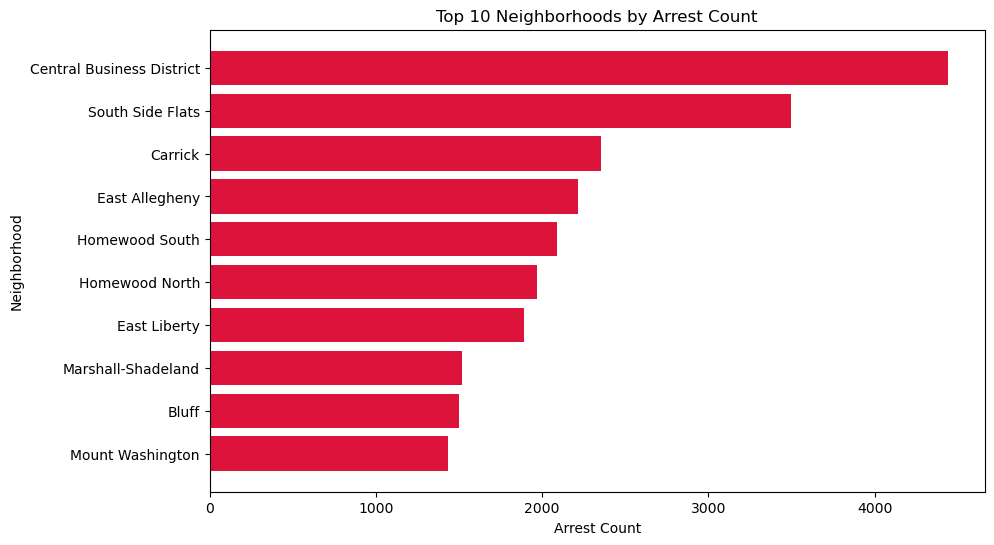

In [9]:
#Most Arrests:
top_10 = arrest_counts.head(10)
#PLOT
plt.figure(figsize=(10,6))
plt.barh(top_10['Neighborhood'], top_10['Arrest Count'], color='crimson')
plt.gca().invert_yaxis()
plt.title("Top 10 Neighborhoods by Arrest Count")
plt.xlabel("Arrest Count")
plt.ylabel("Neighborhood")
plt.show()


##### Observation: CENTRAL BUSINESS DISTRICT MOST ARRESTS

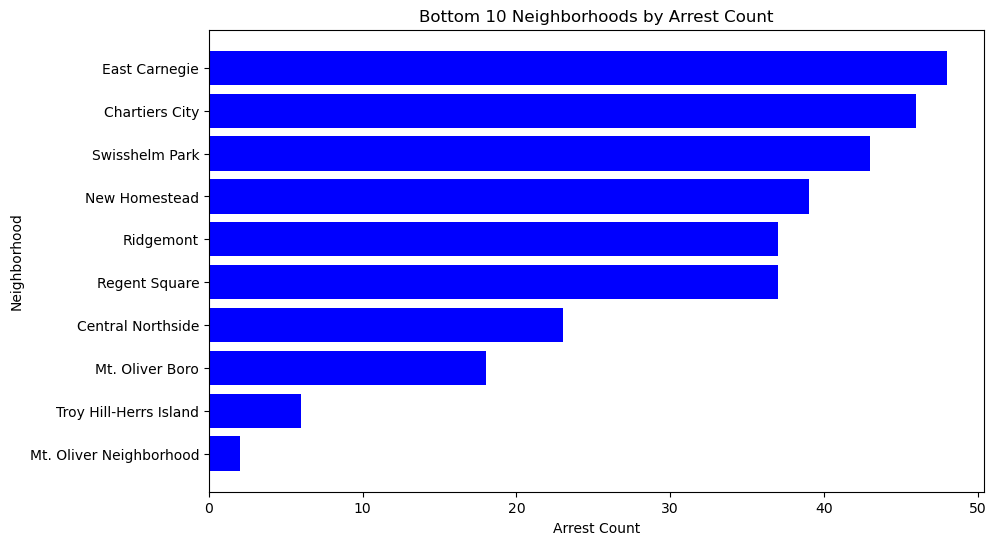

In [22]:
#Least Arrests:
least_10 = arrest_counts.tail(10)
#PLOT
plt.figure(figsize=(10,6))
plt.barh(least_10['Neighborhood'], least_10['Arrest Count'], color='blue')
plt.gca().invert_yaxis()
plt.title("Bottom 10 Neighborhoods by Arrest Count")
plt.xlabel("Arrest Count")
plt.ylabel("Neighborhood")
plt.show()


##### Observation: Mt.Oliver Neighborhood LEAST ARRESTS

#### ADVANCED ANALYSIS:

In [11]:
df_clean['OFFENSES'] = df_clean['OFFENSES'].fillna('').str.lower()
df_clean['OFFENSES'] = df_clean['OFFENSES'].str.lower()

In [25]:
# Assign severity to offenses (in consideration with the other offenses from the list)
def classify_severity(offense):
    if 'aggravated assault' in offense or 'strangulation' in offense or 'terroristic threats' in offense:
        return 5
    elif 'simple assault' in offense or 'bench warrant' in offense or 'failure to appear' in offense:
        return 4
    elif 'dui' in offense or 'retail theft' in offense or 'theft' in offense or 'receiving stolen property' in offense:
        return 3
    elif 'controlled substance' in offense or 'marijuana' in offense or 'paraphernalia' in offense or 'contempt' in offense:
        return 2
    else:
        return 1

df_clean['Severity'] = df_clean['OFFENSES'].apply(classify_severity)

df_clean.head(5)


,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,Severity
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 retail theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551,3
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 retail theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625,3
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 disorderly conduct. / 5505 public drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080,1
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 aggravated assault. / 2705 recklessy enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900,5
5,6,1974556,16144301,45.0,M,W,2016-08-15T13:30:00,"600 Block 1st AV Pittsburgh, PA 15219",3929 retail theft.,"800 Block Hazelwood AV Pittsburgh, PA 15217",Greenfield,4,1517.0,5.0,3.0,-79.929238,40.419699,3


In [13]:
#Find the average severity by neighborhood
severity_by_neighborhood = df_clean.groupby('INCIDENTNEIGHBORHOOD')['Severity'].mean().reset_index()
severity_by_neighborhood.columns = ['Neighborhood', 'Average Severity']

arrest_counts = df_clean['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
arrest_counts.columns = ['Neighborhood', 'Arrest Count']

# Merge severity & count
combined_df = pd.merge(arrest_counts, severity_by_neighborhood, on='Neighborhood')

combined_df

,Neighborhood,Arrest Count,Average Severity
0,Central Business District,4440,2.925000
1,South Side Flats,3497,2.931656
2,Carrick,2352,3.261480
3,East Allegheny,2217,2.783942
4,Homewood South,2090,3.010048
...,...,...,...
92,Regent Square,37,2.513514
93,Central Northside,23,2.826087
94,Mt. Oliver Boro,18,3.111111
95,Troy Hill-Herrs Island,6,2.666667


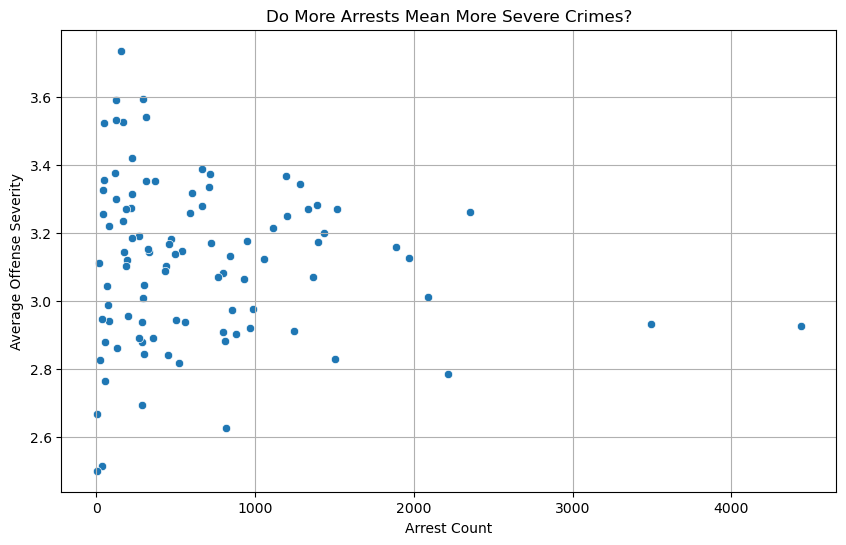

Correlation: -0.08


In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='Arrest Count', y='Average Severity')
plt.title('Do More Arrests Mean More Severe Crimes?')
plt.xlabel('Arrest Count')
plt.ylabel('Average Offense Severity')
plt.grid(True)
plt.show()


correlation = combined_df['Arrest Count'].corr(combined_df['Average Severity'])
print(f"Correlation: {correlation:.2f}")

In [16]:
severe_df = df_clean[df_clean['Severity'] >= 4]
severe_percent = severe_df.groupby('INCIDENTNEIGHBORHOOD').size() / df_clean.groupby('INCIDENTNEIGHBORHOOD').size()
severe_percent = severe_percent.dropna().sort_values(ascending=False)

filtered_neighborhoods = severe_percent.loc[
    ['Central Business District', 'Mt. Oliver Neighborhood']
]
print(filtered_neighborhoods)

INCIDENTNEIGHBORHOOD
Central Business District    0.426577
Mt. Oliver Neighborhood      0.500000
dtype: float64


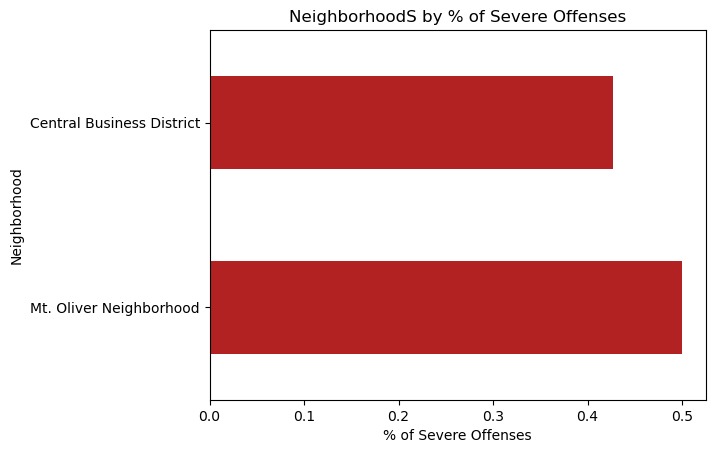

In [17]:
filtered_neighborhoods.head(10).plot(kind = 'barh',color='firebrick')
plt.title('Neighborhoods by % of Severe Offenses')
plt.xlabel('% of Severe Offenses')
plt.ylabel('Neighborhood')
plt.gca().invert_yaxis()
plt.show()

### **Tax and Properties**

{'South Side Flats': 357, 'Mount Washington': 530, 'Duquesne Heights': 155, 'South Side Slopes': 392, 'Arlington': 238, 'Elliott': 341, 'East Allegheny': 197, 'Polish Hill': 126, 'North Oakland': 91, 'South Oakland': 149, 'Knoxville': 569, 'Beechview': 528, 'Westwood': 126, 'Crafton Heights': 226, 'Marshall-Shadeland': 768, 'Perry South': 821, 'Fineview': 144, 'Lower Lawrenceville': 186, 'Carrick': 643, 'Banksville': 94, 'Upper Lawrenceville': 199, 'Central Lawrenceville': 256, 'Stanton Heights': 255, 'East Liberty': 206, 'Shadyside': 395, 'Squirrel Hill South': 424, 'Greenfield': 267, 'New Homestead': 156, 'Brookline': 474, 'Larimer': 287, 'Lincoln-Lemington-Belmar': 1031, 'Lincoln Place': 204, 'East Hills': 656, 'Central Business District': 118, 'South Shore': 12, 'Crawford-Roberts': 248, 'Bluff': 64, 'Allentown': 318, 'West End': 63, 'Chateau': 10, 'Manchester': 282, 'Allegheny West': 25, 'Allegheny Center': 2, 'North Shore': 17, 'Strip District': 109, 'Bedford Dwellings': 59, 'Midd

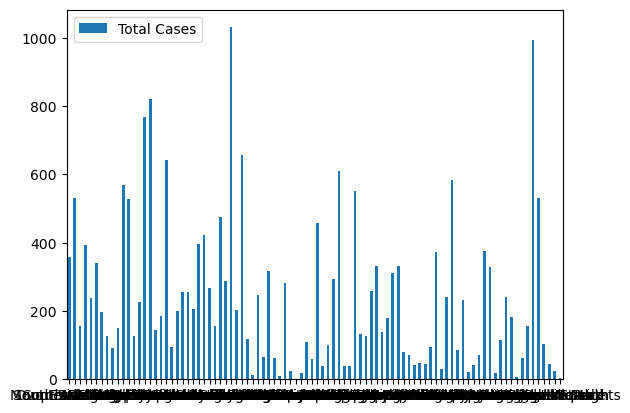

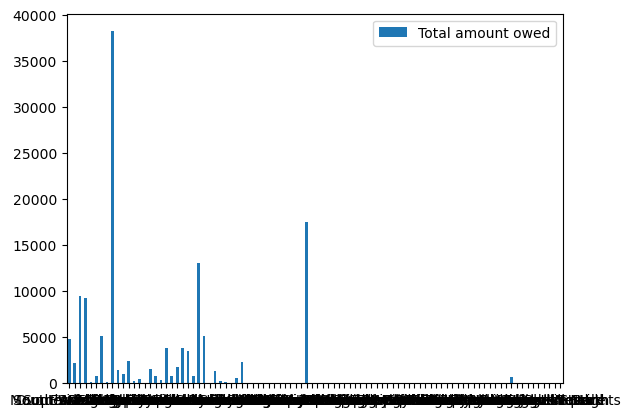

In [18]:
#import geopandas
import pandas
#from shapely.geometry import Point
import pandas as pd
#import fpsnippets 
tax = pd.read_csv("taxDelinquency.tsv", sep="\t")
tax.head(5)

unique_values = tax['neighborhood'].unique()
#print(unique_values)

bo = {}
'''
for index, row in tax.iterrows():
        #print(f"Index: {index}")
        #print(f"col1: {row['neighborhood']}")
        neighbor = geo_to_neighborhood(row['latitude'], row['longitude'])
        print(neighbor)
        if neighbor not in bo:
            bo[neighbor] = 1
        else:
            bo[neighbor] += 1
         
print(bo)
''' 
taxCount = {}
taxTotal = {}
for index, row in tax.iterrows():
        #print(f"Index: {index}")
        #print(f"col1: {row['neighborhood']}")

        if row['neighborhood'] not in taxCount:
            taxCount[row['neighborhood']] = 1
            taxTotal[row['neighborhood']] = row['current_delq_tax'] 
        else:
            taxCount[row['neighborhood']] += 1
            taxTotal[row['neighborhood']] += row['current_delq_tax'] 
         
print(taxCount)
print(taxTotal)

speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = unique_values
#print(index)
df = pd.DataFrame({'Total Cases': taxCount.values()}, index=index)
ax = df.plot.bar(rot=0)

df2 = pd.DataFrame({'Total amount owed': taxTotal.values()}, index=index)
bx = df2.plot.bar(rot=0)

#condemn = pd.read_csv("condemnedProperties.tsv", sep="\t")
#condemn.head(5)

# CONCLUSION:

Based off of my analysis, Ridgemont proves to be the most responsible neighborhood when it comes to Non-Traffic Violations. On the other hand, the least responsible neighborhood when it comes to Non-Traffic Violations is the Central Business District. There is a drastic difference between both as Ridgemont has 4 non-traffic violations, whereas the Central Business District has 2027 non-traffic violations. The differences can be attributed to population and significance to the city.

After analyzing the arrest data, I concluded that the Central Business District is the least responsible neighborhood. On the other hand, Mt. Oliver is the most responsible neighborhood based on arrest data. The Central Business District totals 4400 arrests, while Mt. Oliver totals only 2 arrests! This vast difference can be attributed to the difference in population for both neighborhoods and civilian activity.

Based off of my analysis, the neighborhood with the least amount of people with deliquent taxes is Allegheny Central. Based off of this, we can assume that it is the most responsible when it comes to tax and properties. Similarly, the Central Business District owes the least amount of taxes combined. This indicates a neighborhood that can be deemed responsible. On the other hand, Central Lawrenceville proves to owe the most amount of taxes, making it one of the least responsible neighborhoods in the city. 

HAVE TO COMBINE ALL THESE INTO ONE MAIN CONCLUSION.